## A standard heat equation solver in FEniCS

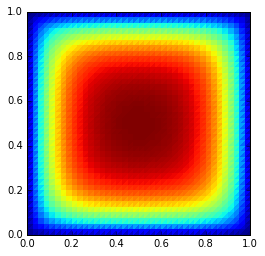

In [7]:
%matplotlib inline
from dolfin import *
from dolfin_adjoint import *
adj_reset()
set_log_level(ERROR)

mesh = UnitSquareMesh(40, 40)
V = FunctionSpace(mesh, "CG", 2)

v = TestFunction(V)# Testfunction 
u_ = Function(V)   # Old u
u = Function(V)    # New u
f = Function(V)    # Forcing term
f.vector()[:] = 1
nu = Function(V)   # Viscosity
nu.vector()[:] = 0.001

t = 0.0
end = 20
timestep = Constant(1)

# Variational form
F = (u - u_)/timestep*v*dx + nu*inner(grad(u), grad(v))*dx - f*v*dx
bc = DirichletBC(V, 0.0, "on_boundary")

# Time loop
while (t <= end):
    solve(F == 0, u, bc)
    u_.assign(u)
    t += float(timestep)
plot(u)

## We need to make one modifiations to use dolfin-adjoint

On the second line:
```python
from dolfin_adjoint import *
```

## Now we can compute the define the functional, the control and compute the derivative

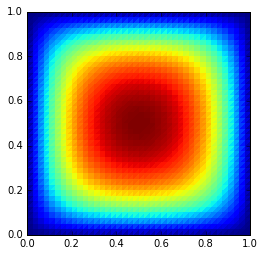

In [9]:
J = Functional(u*u*dx*dt[FINISH_TIME] + u*u*dx*dt[START_TIME])
ctrl = Control(f)

dJdf = compute_gradient(J, ctrl, forget=False, project=True)
plot(dJdf)

## ... or with respect to nu

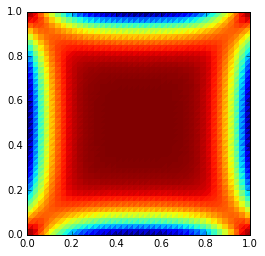

In [11]:
ctrl = [Control(f), Control(nu)]

dJdf, dJdnu = compute_gradient(J, ctrl, forget=False, project=True)
plot(dJdnu)

## Or even solve an optimization problem!

In [3]:
rf = ReducedFunctional(J, ctrl)
nu_opt = minimize(rf, options={"maxiter": 10})